##### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Loading the dataset

In [1]:
data = pd.read_csv("wine.data.txt")

##### Look at the data / Data head

In [84]:
data.head()

,Wine_types,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### Target Values

In [85]:
data['Wine_types'].head()

0    1
1    1
2    1
3    1
4    1
Name: Wine_types, dtype: int64

##### Loading Features and Target

In [86]:
X = data.iloc[:, 1:14].values  
y = data.iloc[:, 0].values 

##### Split Train and Test Sets

In [87]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

##### Transform Feature Values

In [88]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

##### Fit Model

In [89]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

##### Predict Metric

In [90]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.05555555555555555
[[16  0  0]
 [ 1 21  2]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        16
          2       1.00      0.88      0.93        24
          3       0.88      1.00      0.93        14

avg / total       0.95      0.94      0.94        54

Accuracy: 0.9444444444444444


##### Finding the Optimal K

In [91]:
error = []

# Calculating error for K values between 1 and 125
for i in range(1, 125):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

##### Plot Result

Text(0,0.5,'Mean Error')

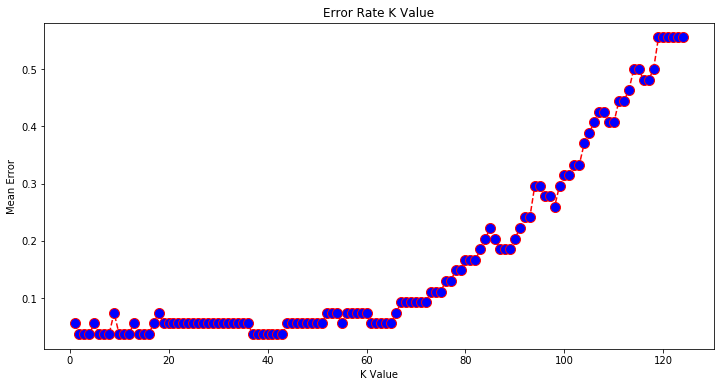

In [92]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 125), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

##### Now Fitting the Optimal K

In [93]:
classifier = KNeighborsClassifier(n_neighbors=102)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=102, p=2,
           weights='uniform')

In [94]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[13  3  0]
 [ 1 23  0]
 [ 4 10  0]]
             precision    recall  f1-score   support

          1       0.72      0.81      0.76        16
          2       0.64      0.96      0.77        24
          3       0.00      0.00      0.00        14

avg / total       0.50      0.67      0.57        54

Accuracy: 0.6666666666666666


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Fitting the Optimal K=90

In [95]:
classifier = KNeighborsClassifier(n_neighbors=90)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='uniform')

In [96]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 2 22  0]
 [ 1  8  5]]
             precision    recall  f1-score   support

          1       0.84      1.00      0.91        16
          2       0.73      0.92      0.81        24
          3       1.00      0.36      0.53        14

avg / total       0.83      0.80      0.77        54

Accuracy: 0.7962962962962963


##### Fitting the Optimal K=60

In [97]:
classifier = KNeighborsClassifier(n_neighbors=60)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform')

In [98]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 4 20  0]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       0.80      1.00      0.89        16
          2       1.00      0.83      0.91        24
          3       1.00      1.00      1.00        14

avg / total       0.94      0.93      0.93        54

Accuracy: 0.9259259259259259


##### Fitting the Optimal K=3

In [99]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [100]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 1 22  1]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        16
          2       1.00      0.92      0.96        24
          3       0.93      1.00      0.97        14

avg / total       0.97      0.96      0.96        54

Accuracy: 0.9629629629629629


In [ ]:
# saving the model
from copyreg import pickle


pickle.dump(classification_report(y_test, y_pred), open('model.pkl', 'wb'))